In [1]:
pip install jupyterthemes

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade jupyterthemes

Note: you may need to restart the kernel to use updated packages.


In [3]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [4]:
!jt -t chesterish -f inputmono -fs 11 -nf opensans -ofs 10 -altmd -altout -cellw 92%  -T -N -kl

In [5]:
from jupyterthemes import jtplot
jtplot.style()

In [6]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Let's load the Nashville zipcode data and look at the first few rows
    - geopandas reads files with the read_file( ) method
    - The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku

In [7]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')

In [8]:
print(zipcodes.crs)

epsg:4326


In [9]:
zipcodes.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [10]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

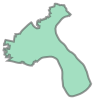

In [11]:
zipcodes.loc[0, 'geometry']

In [12]:
print(zipcodes.loc[0, 'geometry'])

MULTIPOLYGON (((-86.68724897141 36.318212121092, -86.687216475338 36.318210560887, -86.687181702435 36.318208780693, -86.68714696276101 36.318206917893, -86.68711218725601 36.318205000347, -86.687077445444 36.318202972151, -86.687042702928 36.318200862685, -86.68703469075101 36.318200362824, -86.687007959928 36.318198697129, -86.68697325063 36.318196422067, -86.686938539918 36.318194065167, -86.68690382778099 36.318191625285, -86.68686914958001 36.318189102792, -86.68683443743301 36.318186498074, -86.6867997571 36.318183810757, -86.686765111412 36.318181040826, -86.686730430357 36.318178188106, -86.686695782299 36.318175225883, -86.68666116771 36.318172208522, -86.686626552408 36.318169108746, -86.686591935688 36.318165926561, -86.68655731872499 36.318162634491, -86.686522735235 36.318159287854, -86.68648815149901 36.318155830759, -86.686453600524 36.318152318529, -86.68641904813001 36.31814872389, -86.68638449549 36.318145018792, -86.686349976324 36.318141259129, -86.68631549014999 36

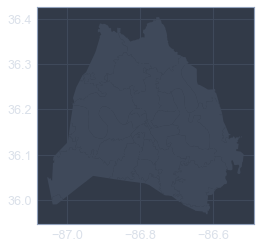

In [13]:
zipcodes.plot();

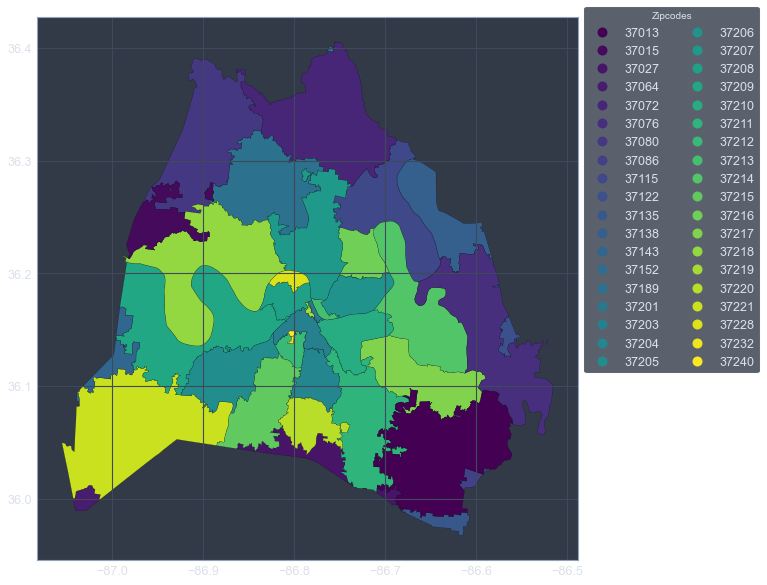

In [14]:
leg_kwds = {'title': 'Zipcodes',
            'loc': 'upper left',
            'bbox_to_anchor': (1,1.03),
            'ncol': 2}

zipcodes.plot(column = 'zip',
              figsize=(10,10),
              edgecolor = 'black',
              legend = True,
              legend_kwds = leg_kwds,
              cmap = 'viridis'
#             cmap = 'terrain'
             )

plt.show()

#### Next you will read in the point data
- downloaded from https://data.nashville.gov/History/Historical-Markers/vk65-u7my
- cleaned:
    - drop unwanted columns (blank lat/lon)
- print the shape
- take a look at the first 3 rows

In [15]:
hist_marks = pd.read_csv("../data/Historical_Markers_cleaned.csv")
print(hist_marks.shape)
hist_marks.head(3)

(216, 11)


,Number,Year Erected,Marker Name,Marker Text,Civil War Site?,Notes,Location,Latitude,Longitude,Condition,Mapped Location
0,6,1968.0,Battle of Nashville Stewart's Line,"Loring's division of Stewart's Corps, Hood's C...",True,NaN,4618 Lealand Lane,36.086311,-86.791167,NaN,POINT (-86.791167 36.086311)
1,90,1992.0,University School of Nashville,Founded in 1915 as the successor to The Winthr...,NaN,NaN,2000 Edgehill Avenue,36.143990,-86.798228,NaN,POINT (-86.798228 36.14399)
2,168,2018.0,May-granbery House and Alford Cemetery,Revolutionary War Pvt. John Alford built a two...,NaN,Council District 4,621 Hill Road,36.047802,-86.754991,NaN,POINT (-86.754991 36.047802)


In [16]:
hist_marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Number           216 non-null    int64  
 1   Year Erected     211 non-null    float64
 2   Marker Name      216 non-null    object 
 3   Marker Text      216 non-null    object 
 4   Civil War Site?  10 non-null     object 
 5   Notes            107 non-null    object 
 6   Location         216 non-null    object 
 7   Latitude         216 non-null    float64
 8   Longitude        216 non-null    float64
 9   Condition        15 non-null     object 
 10  Mapped Location  216 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 18.7+ KB


#### In order to spatially join the historical markers with the zipcodes, you will need to create a GeoDataFrame of historical markers
- First create a geometry column that is a `Point` datatype

In [17]:
hist_marks['geometry'] = hist_marks.apply(lambda x: Point((float(x.Longitude),
                                                           float(x.Latitude))),
                                          axis=1)
hist_marks.head(3)

,Number,Year Erected,Marker Name,Marker Text,Civil War Site?,Notes,Location,Latitude,Longitude,Condition,Mapped Location,geometry
0,6,1968.0,Battle of Nashville Stewart's Line,"Loring's division of Stewart's Corps, Hood's C...",True,NaN,4618 Lealand Lane,36.086311,-86.791167,NaN,POINT (-86.791167 36.086311),POINT (-86.791167 36.086311)
1,90,1992.0,University School of Nashville,Founded in 1915 as the successor to The Winthr...,NaN,NaN,2000 Edgehill Avenue,36.143990,-86.798228,NaN,POINT (-86.798228 36.14399),POINT (-86.79822799999999 36.14399)
2,168,2018.0,May-granbery House and Alford Cemetery,Revolutionary War Pvt. John Alford built a two...,NaN,Council District 4,621 Hill Road,36.047802,-86.754991,NaN,POINT (-86.754991 36.047802),POINT (-86.754991 36.047802)


#### let's clean it up a little bit
 - you only need the marker name, marker text, geometry

In [18]:
hist_marks = hist_marks[['Year Erected', 'Marker Name', 'Marker Text', 'Latitude', 'Longitude', 'geometry']]

#### Now that the historical marks data has a geometry field, you can use it to build a GeoDataFrame 
- you want the CRS for the historical marks to match the CRS in the zipcodes GeoDataFrame 


In [19]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### The GeoDataFrame( ) constructor needs 3 parameters:
- a DataFrame
- a coordinate reference system
- geometry

In [20]:
hist_geo = gpd.GeoDataFrame(hist_marks,
                           crs = zipcodes.crs,
                           geometry = hist_marks['geometry'])

In [21]:
type(hist_geo)

geopandas.geodataframe.GeoDataFrame

#### Now you are ready to combine historical marks and zipcodes with a spatial join
- first a little clean up for the zipcodes
    - just keep the zip, po_name, and geometry columns
- then construct the join
    - keep in mind that you want to find the historical marks within a zip code polygon
    - the geometry for the new (combined) GeoDataFrame comes from the left GeoDataFrame

In [22]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [23]:
zipcodes.info

<bound method DataFrame.info of       zip         po_name                                           geometry
0   37115         MADISON  MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ...
1   37216       NASHVILLE  MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ...
2   37204       NASHVILLE  MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...
3   37027       BRENTWOOD  MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...
4   37064        FRANKLIN  MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ...
5   37143          PEGRAM  MULTIPOLYGON (((-87.03553 36.08659, -87.03556 ...
6   37080         JOELTON  MULTIPOLYGON (((-86.86263 36.37811, -86.86264 ...
7   37221       NASHVILLE  MULTIPOLYGON (((-86.97084 36.11644, -86.97084 ...
8   37072  GOODLETTSVILLE  MULTIPOLYGON (((-86.75361 36.40428, -86.75354 ...
9   37212       NASHVILLE  MULTIPOLYGON (((-86.80790 36.14643, -86.80605 ...
10  37135     NOLENSVILLE  MULTIPOLYGON (((-86.67188 35.98955, -86.67189 ...
11  37027       BRENTWOOD  MULTIPOLYGON (((-

In [24]:
marks_by_zip = gpd.sjoin(hist_geo, zipcodes, op = 'within')

In [25]:
marks_by_zip.head()

,Year Erected,Marker Name,Marker Text,Latitude,Longitude,geometry,index_right,zip,po_name
0,1968.0,Battle of Nashville Stewart's Line,"Loring's division of Stewart's Corps, Hood's C...",36.086311,-86.791167,POINT (-86.79117 36.08631),53,37220,NASHVILLE
14,2008.0,Dry-stack Stone Walls,"Dry-stack stone walls, a Scots-Irish building ...",36.085384,-86.804379,POINT (-86.80438 36.08538),53,37220,NASHVILLE
114,2008.0,"Battle of Nashville (december 16, 1864) Confed...",After the withdrawal from the main Confederate...,36.077687,-86.777135,POINT (-86.77714 36.07769),53,37220,NASHVILLE
145,2019.0,Crieve Hall,The Crieve Hall neighborhood was part of the o...,36.065264,-86.757741,POINT (-86.75774 36.06526),53,37220,NASHVILLE
177,1970.0,Granny White Grave,Lucinda 'Granny' White of N.C. acquired 50 acr...,36.073301,-86.807104,POINT (-86.80710 36.07330),53,37220,NASHVILLE


#### Now that the data is joined spatially you can count the historical marks by zip code and see how many marks are within each polygon
    - using the value_counts() method
    

In [26]:
marks_by_zip['zip'].value_counts()

37203    42
37212    15
37208    14
37209    12
37205    11
37201    11
37206    11
37210    10
37221     8
37215     8
37204     7
37211     7
37217     6
37214     6
37013     6
37218     5
37220     5
37207     5
37115     4
37219     4
37138     4
37228     3
37076     3
37216     2
37213     2
37080     1
37027     1
37072     1
37189     1
Name: zip, dtype: int64

#### Let's take a closer look at the 42 historical marks in the 37203 zip code
    - filter the marks_by_zip to get just the historical marks in 37203
    - filter the zip code geodataframe to just the polygon (row) for 37203

In [27]:
marks_in_37203 = marks_by_zip.loc[marks_by_zip['zip']== '37203']
marks_in_37203.shape

(42, 9)

In [28]:
polygon37203 = zipcodes.loc[zipcodes['zip'] == '37203']
polygon37203.shape

(1, 3)

In [29]:
polygon37203

,zip,po_name,geometry
35,37203,NASHVILLE,"MULTIPOLYGON (((-86.78734 36.16688, -86.78711 ..."


#### Now plot these two together
    - first plot the polygons for 37203 and make them gray
    - next plot the points for the historical marks and color them by a Year Erected

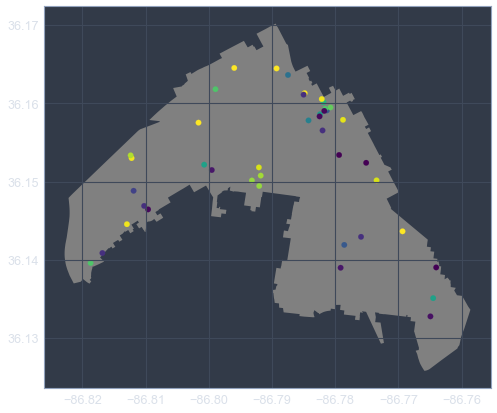

In [30]:
ax = polygon37203.plot(figsize = (8,10), color = 'gray')
marks_in_37203.plot(ax = ax, column = 'Year Erected')
plt.show();

#### We're getting there! It would be helpful to have streets though, wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map.
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon

In [31]:
polygon37203.geometry.centroid

C:\Users\Samantha\AppData\Local\Temp/ipykernel_27488/651956959.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37203.geometry.centroid


35    POINT (-86.78899 36.14860)
dtype: geometry

In [32]:
center = polygon37203.geometry.centroid
print(center)

35    POINT (-86.78899 36.14860)
dtype: geometry


C:\Users\Samantha\AppData\Local\Temp/ipykernel_27488/1693422230.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37203.geometry.centroid


#### Folium requires a location point as an array
- with latitude first
- but shapely Points have longitude first

In [33]:
area_center = [center.y, center.x]
print(area_center)

[35    36.148602
dtype: float64, 35   -86.788989
dtype: float64]


#### To create a folium map just call the folium Map() constructor
- location is the only argument required by the constructor
    - Set area_center as the location of the folium map.
- zoom_start is an optional argument
    - A setting of 12 should get us nice and close.

In [34]:
map_37203 = folium.Map(location = area_center, zoom_start = 12)
map_37203

#### Next, let's add our 37203 polygon and Historical Marks markers.

itterrows() is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values.
   
   - Below, we are printing the row values for the first 3 rows as we iterate through the GeoDataFrame of Historical Markers in 37203.
   - This idea will be helpful for creating our markers!

In [35]:
i=0
for row_index, row_values in marks_in_37203.iterrows():
    if i<3:
        print(' ')
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print(' ')
        print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
        i+=1

 
index is 20
values are:
 
Year Erected                                               2019.0
Marker Name                      Nashville Porter and Ale Brewery
Marker Text     In 1815, T.M. Burland opened a small brewery 1...
Latitude                                                36.157522
Longitude                                              -86.801631
geometry                             POINT (-86.801631 36.157522)
index_right                                                    35
zip                                                         37203
po_name                                                 NASHVILLE
Name: 20, dtype: object
 
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
 
index is 21
values are:
 
Year Erected                                               2011.0
Marker Name                                       Bradley Studios
Marker Text     In 1955, brothers Owen and Harold Bradley buil...
Latitude                                                3

#### Create map_37203 again with additional features:
- add the zipcode area outline (polygon_37203)
- iterate through the marks_in_37203 to
    - create location from each Latitude and Longitude
    - create a popup from the stop column
    - build a marker from each location and popup
    - add the marker to map_37203
- display map_37203

In [36]:
map_37203 = folium.Map(location = area_center, zoom_start =12)

folium.GeoJson(polygon37203).add_to(map_37203)

for row_index, row_values in marks_in_37203.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Marker Name'])
    icon = folium.Icon(color="darkpurple",icon='institution', prefix='fa')
    
    marker = folium.Marker(
            location = loc,
            popup = pop,
            icon = icon)
    
    marker.add_to(map_37203)
    
map_37203.save('../maps/map37203.html')

map_37203

#### If you have a lot of markers, you might want to use marker clusters
- Folium has MarkerCluster() and FastMarkerCluster()
- Construct a MarkerCluster()
    - construct a MarkerCluster() and .add_to() the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a FastMarkerCluster() by passing a list of locations

#### You can save your map as an html file and it will retain the interactive qualities

In [37]:
folium.Map?

In [38]:
cluster_map_37203 = folium.Map(location = area_center, zoom_start = 12)

marker_cluster = MarkerCluster().add_to(cluster_map_37203)

folium.GeoJson(polygon37203).add_to(cluster_map_37203)

for row_index, row_values in marks_in_37203.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Marker Name'])
    icon = folium.Icon(color='darkpurple', icon='institution', prefix='fa')
    
    marker = folium.Marker(
             location = loc,
             popup = pop,
             icon = icon)
    
    marker.add_to(marker_cluster)
    
cluster_map_37203.save('../maps/cluster37203.html')

cluster_map_37203

In [39]:
map_37203 = folium.Map(location = area_center, zoom_start = 12)

folium.GeoJson(polygon37203).add_to(map_37203)

locations = marks_in_37203[['Latitude', 'Longitude']].values.tolist()
map_37203.add_child(FastMarkerCluster(locations))

map_37203